# Titanic: Survival prediction

## Performing EDA(Explototry Data Analysis)

#### Importing Packages
We will import these packages which will help us to manipulate data and visualize data.
We use pandas and numpy for data analysis. For Data visualization we use matplotlib with seaborn.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


**Loading data set**

In [2]:
train_df = pd.read_csv(r'C:\Users\Amir Khan\titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\Amir Khan\titanic\test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Our dataset has many NAN values. We have to preprocess it before fetching it ot Machine learning model.

In [9]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


## Dealing with NAN values.
There are NaN values in our data set.These NaN values will get in the way of training our model. We need to fill in the NaN values with replacement values in order for our ML model to have a complete prediction for every row in the dataset.

**Lets check Number of NaN values in each columns.**

In [10]:
pd.isna(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
pd.isna(test_df).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have so many NaN values is **Age** and **Cabin** column.

In [12]:
train_df['Cabin'].sample(5)

594     NaN
273    C118
510     NaN
15      NaN
442     NaN
Name: Cabin, dtype: object

In [13]:
train_df['Ticket'].sample(10)

88      19950
692      1601
229      4133
740     16988
803      2625
605    349910
640    350050
116    370369
577     13507
8      347742
Name: Ticket, dtype: object

It seems that cabin column have more NaN values, dropping this columns will not effect our model and even Name and Ticket column is not related much. Therefore we can drop **Name**,**Cabin** and **Ticket** column    

In [14]:
train_df.drop(labels=['Cabin','Ticket','Name'],axis = 1,inplace=True)

test_df.drop(labels=['Cabin','Ticket','Name'],axis = 1,inplace=True)

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [16]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
810,811,0,3,male,26.0,0,0,7.8875,S
641,642,1,1,female,24.0,0,0,69.3000,C
737,738,1,1,male,35.0,0,0,512.3292,C
451,452,0,3,male,NaN,1,0,19.9667,S
853,854,1,1,female,16.0,0,1,39.4000,S
632,633,1,1,male,32.0,0,0,30.5000,C
817,818,0,2,male,31.0,1,1,37.0042,C
440,441,1,2,female,45.0,1,1,26.2500,S
59,60,0,3,male,11.0,5,2,46.9000,S
442,443,0,3,male,25.0,1,0,7.7750,S


In [18]:
print(pd.isna(train_df).sum())
print()
print(pd.isna(test_df).sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


We need fill NaN values in *Age* column.
Lets plot a distribution of *Age* and look for the skewness in it so we can determine what to replace with NaN values.

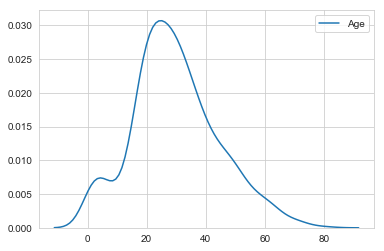

In [19]:
copy_df = train_df['Age'].copy()
copy_df.dropna(inplace=True)
sns.kdeplot(copy_df)

Looks like the distribution of *Ages* is skewed towards right.To increase accuracy of our model we will replace NaN values with meadian of **Ages** as distribution is skewed towards right.

In [20]:
#filling nan for Age
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

Lets compare both the distributions of Ages(Before filling NaN) and After filling NaN

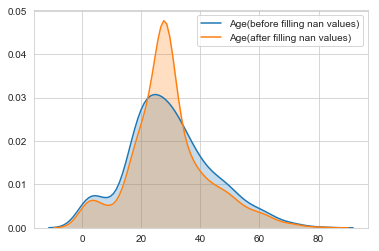

In [21]:
sns.kdeplot(copy_df,shade=1,label='Age(before filling nan values)')
sns.kdeplot(train_df['Age'],shade=1,label='Age(after filling nan values)')

Looks like after filling NaN with median the dstribution is now less skewed towards right compare to the distribution of ages without filling nan.This will increase our accuracy of ML model.

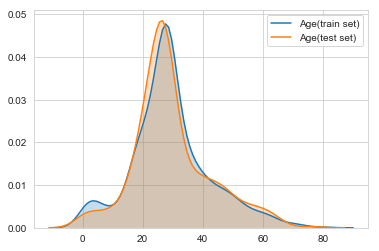

In [22]:
sns.kdeplot(train_df['Age'],shade=1,label='Age(train set)')
sns.kdeplot(test_df['Age'],shade=1,label='Age(test set)')
plt.legend()

Filling NaN for **Fare** in test set

In [23]:
#filling nan value for fare in test Data 
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

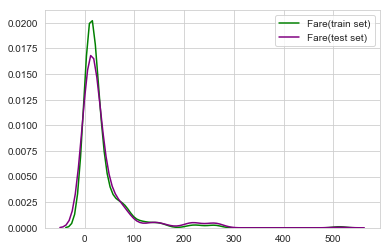

In [24]:
sns.kdeplot(train_df['Fare'],color='g',label='Fare(train set)')
sns.kdeplot(test_df['Fare'],color='purple',label='Fare(test set)')
plt.legend()

In [25]:
train_df['Embarked'].fillna('S',inplace=True)

Text(0, 0.5, 'Count')

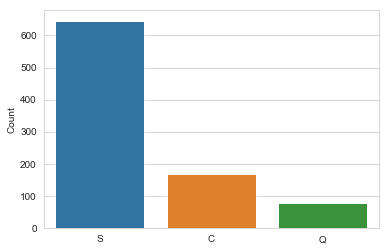

In [26]:
plot=train_df['Embarked'].value_counts().index[0:3]
sns.barplot(x=plot,y=train_df['Embarked'].value_counts())
plt.ylabel("Count")

In [27]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


We successfully filled all NaN values in Our test and train set.

## Visualizing Data
By visualizing, we can see the trends and general associations of variables like Sex and Age with survival rate. We can make several different graphs for each feature we want to work with to see the entropy and information gain of the feature.

In [28]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


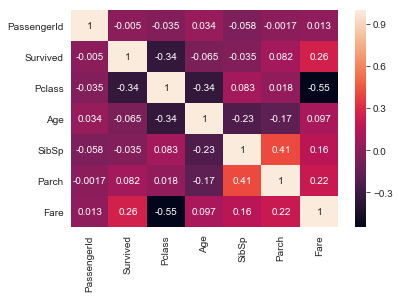

In [29]:
sns.heatmap(train_df.corr(),annot=True).get_figure().savefig('Correleation map.png')

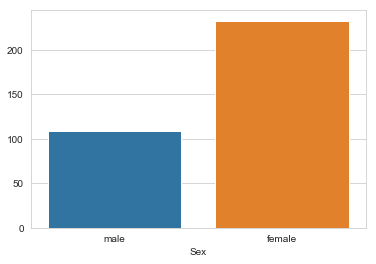

In [30]:
female_survived=((train_df['Sex']=='female')&(train_df['Survived']==1)).sum()
male_survived=((train_df['Sex']=='male')&(train_df['Survived']==1)).sum()
lst = [male_survived,female_survived]

sns.barplot(data=train_df,x="Sex",y=lst)

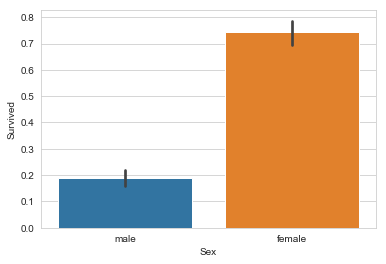

In [31]:
sns.barplot(data=train_df,x="Sex",y='Survived')

By looking at barplot of survival rate of gender it is clear that gender is very good features for prediction.

Lets see how *Class* feature plays a role for survival passenger.

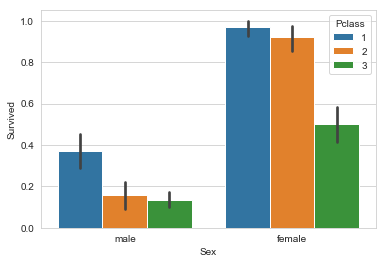

In [32]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)

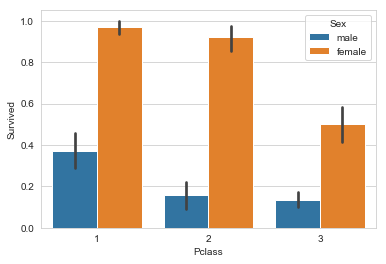

In [33]:
sns.barplot(data=train_df,x='Pclass',y='Survived',hue='Sex')

It appears that *class* also plays a role in survival, as shown by the bar graph. People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

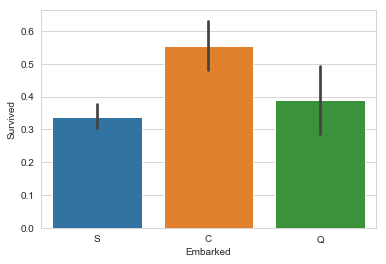

In [34]:
sns.barplot(data=train_df,x='Embarked',y='Survived')

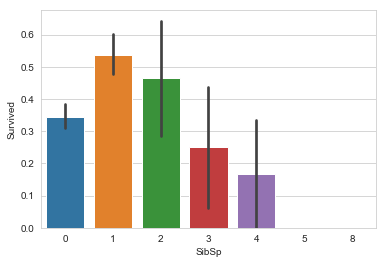

In [35]:
sns.barplot(data=train_df,x='SibSp',y='Survived')

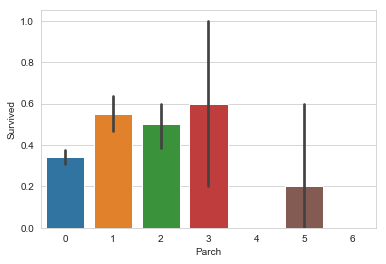

In [36]:
sns.barplot(data=train_df,x='Parch',y='Survived')

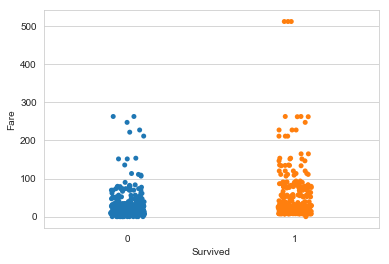

In [37]:
sns.stripplot(x="Survived", y="Fare", data=train_df, jitter=True)

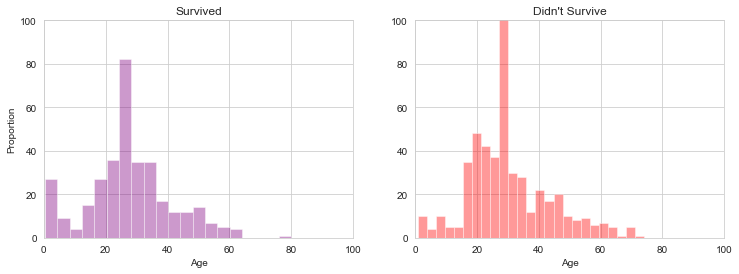

In [38]:
survived_ages = train_df[train_df.Survived == 1]["Age"]
not_survived_ages = train_df[train_df.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False,color='purple')
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False,color='r')
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

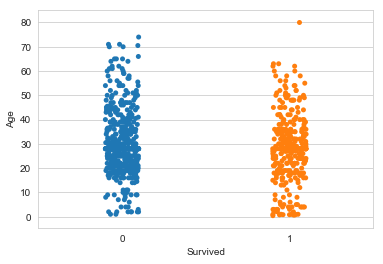

In [39]:
sns.stripplot(x="Survived", y="Age", data=train_df, jitter=True)

It appears as though passengers in the younger range of ages were more likely to survive than those in the older range of ages, as seen by the clustering in the strip plot, as well as the survival distributions of the histogram.

## Feature Engineering
As in our dataset there are features like "Sex" and "Embarked" which are categorical features. we need convert it into numerical values in order to perform classication with our model. We will convert categorical features into numerical values by using **Label-Encoder**.

In [40]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
827,828,1,2,male,1.0,0,2,37.0042,C
876,877,0,3,male,20.0,0,0,9.8458,S
47,48,1,3,female,28.0,0,0,7.7500,Q
116,117,0,3,male,70.5,0,0,7.7500,Q
195,196,1,1,female,58.0,0,0,146.5208,C
340,341,1,2,male,2.0,1,1,26.0000,S
25,26,1,3,female,38.0,1,5,31.3875,S
235,236,0,3,female,28.0,0,0,7.5500,S
595,596,0,3,male,36.0,1,1,24.1500,S
681,682,1,1,male,27.0,0,0,76.7292,C


In [41]:
test_df.sample(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
221,1113,3,male,21.0,0,0,8.0500,S
128,1020,2,male,42.0,0,0,13.0000,S
164,1056,2,male,41.0,0,0,13.0000,S
416,1308,3,male,27.0,0,0,8.0500,S
299,1191,3,male,29.0,0,0,7.8542,S
235,1127,3,male,20.0,0,0,7.8542,S
399,1291,3,male,31.0,0,0,7.7333,Q
89,981,2,male,2.0,1,1,23.0000,S
388,1280,3,male,21.0,0,0,7.7500,Q
108,1000,3,male,27.0,0,0,8.7125,S


In [42]:
from sklearn.preprocessing import LabelEncoder
#encoding sex feature
le_sex = LabelEncoder()
le_sex.fit(train_df["Sex"])

encoded_sex_train_df = le_sex.transform(train_df["Sex"])
train_df["Sex"] = encoded_sex_train_df

encoded_sex_test_df = le_sex.transform(test_df["Sex"])
test_df["Sex"] = encoded_sex_test_df

#encoding Embarked feature
le_embarked = LabelEncoder()
le_embarked.fit(train_df["Embarked"])

#train set
encoded_embarked_train_df = le_embarked.transform(train_df["Embarked"])
train_df["Embarked"] = encoded_embarked_train_df
#test set
encoded_embarked_test_df = le_embarked.transform(test_df["Embarked"])
test_df["Embarked"] = encoded_embarked_test_df

In [43]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,28.0,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


In [44]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
5,897,3,1,14.0,0,0,9.2250,2
6,898,3,0,30.0,0,0,7.6292,1
7,899,2,1,26.0,1,1,29.0000,2
8,900,3,0,18.0,0,0,7.2292,0
9,901,3,1,21.0,2,0,24.1500,2


## Feature Scaling
Now we have converted our categorical features into numerical values.But still there is one problem in our dataset.
If we look at **Age** and **Fare** feature in our dataset, we can see that the values deviate from other features.
This can cause some problems while we model, since it may make these features seem more important than others.
Therefore to avoid this problem we can scale these features to make more representative.
Here I use MinMax Scaler.We can try more feature scaling meathod like Standard scaling.




In [45]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

#We need to reshape our data since the Scaler takes in arrays
age_train = np.array(train_df["Age"]).reshape(-1, 1)
fare_train = np.array(train_df["Fare"]).reshape(-1, 1)

age_test = np.array(test_df["Age"]).reshape(-1, 1)
fare_test = np.array(test_df["Fare"]).reshape(-1, 1)

train_df["Age"] = scaler.fit_transform(age_train)
train_df["Fare"] = scaler.fit_transform(fare_train)
test_df["Age"] = scaler.fit_transform(age_test)
test_df["Fare"] = scaler.fit_transform(fare_test)


In [46]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0.271174,1,0,0.014151,2
1,2,1,1,0,0.472229,1,0,0.139136,0
2,3,1,3,0,0.321438,0,0,0.015469,2
3,4,1,1,0,0.434531,1,0,0.103644,2
4,5,0,3,1,0.434531,0,0,0.015713,2
5,6,0,3,1,0.346569,0,0,0.016510,1
6,7,0,1,1,0.673285,0,0,0.101229,2
7,8,0,3,1,0.019854,3,1,0.041136,2
8,9,1,3,0,0.334004,0,2,0.021731,2
9,10,1,2,0,0.170646,1,0,0.058694,0


In [47]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.452723,0,0,0.015282,1
1,893,3,0,0.617566,1,0,0.013663,2
2,894,2,1,0.815377,0,0,0.018909,1
3,895,3,1,0.353818,0,0,0.016908,2
4,896,3,0,0.287881,1,1,0.023984,2
5,897,3,1,0.182382,0,0,0.018006,2
6,898,3,0,0.393380,0,0,0.014891,1
7,899,2,1,0.340630,1,1,0.056604,2
8,900,3,0,0.235131,0,0,0.014110,0
9,901,3,1,0.274693,2,0,0.047138,2


## Model Fitting, Optimizing and Predicting

Now that our data has been processed and formmated properly, and that we understand the general data we're working with as well as the trends and associations, we can start to build our model.

We will use 2 Machine learning model for classication as this is classification problem.
We use **Logistic Regression** and **SVM(Support Vector Machine)** for classication as see which one perfom better. As our target variable i.e Predictor variable is binary this will be a binary classification. 

Importing SKlearn package, famous ML library for Python.

In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

To evaluate our model performance, we can use the make_scorer and accuracy_score function from sklearn metrics.

In [49]:
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import cross_val_score

We can also use a GridSearch cross validation to find the optimal parameters for the model we choose to work with and use to predict on our testing set.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
X_train = train_df.drop(labels=['PassengerId','Survived'],axis=1)
Y_train = train_df['Survived']

X_test = test_df.drop("PassengerId",axis=1)


In [52]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,1,0,0.014151,2
1,1,0,0.472229,1,0,0.139136,0
2,3,0,0.321438,0,0,0.015469,2
3,1,0,0.434531,1,0,0.103644,2
4,3,1,0.434531,0,0,0.015713,2


In [53]:
#from sklearn.model_selection import train_test_split

#X_training, X_valid, Y_training, Y_valid = train_test_split(X_train, Y_train, test_size=0.2,random_state=0)


## Logistic Regression

In [54]:
LogReg_clf = LogisticRegression()

parameters_LogReg = {"penalty": ["l2"],
                     "solver": ["newton-cg", "lbfgs", "liblinear", "saga"],
                     "max_iter": [50, 100, 200]}


grid_LogReg = GridSearchCV(LogReg_clf, parameters_LogReg, scoring=make_scorer(accuracy_score))
grid_LogReg.fit(X_train, Y_train)

LogReg_clf = grid_LogReg.best_estimator_

LogReg_clf.fit(X_train,Y_train)


scores = cross_val_score(LogReg_clf,X_train, Y_train,cv=5)
scores.mean()

0.7912915053512908

## Support Vector Machine

In [55]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf","linear"]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_train, Y_train)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_train, Y_train)


scores = cross_val_score(svc_clf,X_train, Y_train, cv=5)
scores.mean()
    



0.810304537186674

It seems that SVM perfom well in this case